# Modelo base K-Means

## 1. Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.cluster import KMeans
from random import sample
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import shap

#Mostrar todas las columnas de un dataframe
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 2. Importación de data

In [2]:
#Seleccionar ruta de la data
dataframe = pd.read_csv(r'C:\GIT_Cumplimiento\epic\EPIC003\data\modeling\03_train_v4.csv', encoding='latin')
dataframe.shape

(13516, 13)

## 3. Procesamiento variables

In [3]:
#Listo variables en dataframe
dataframe.columns

Index(['Unnamed: 0', 'PERIODO', 'CODCLAVECIC', 'NBRCLIORDENANTE', 'SEGMENTO',
       'MTO_TRANSF', 'CTD_OPE', 'FLG_PEP', 'FLG_PROF', 'FLG_PAR', 'FLG_PERFIL',
       'CTDEVAL', 'FLG_PAIS'],
      dtype='object')

In [4]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PEP', 'FLG_PROF', 'FLG_PAIS', 'FLG_PERFIL','CTDEVAL']]

In [5]:
#Escalo variables
data_cluster = MinMaxScaler().fit_transform(ds)

## 4. Modelo base

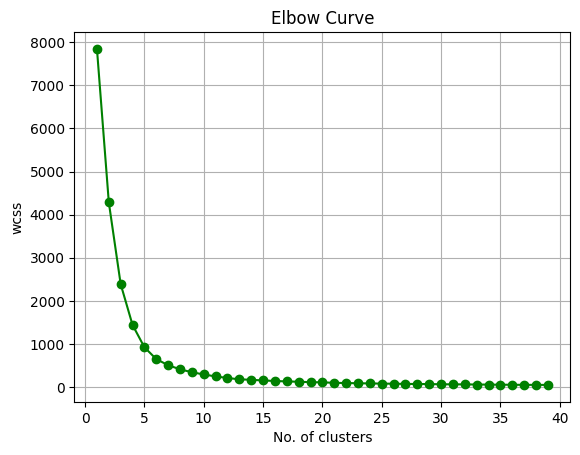

In [6]:
#Obtengo número óptimo de clusters
wcss=[]
for i in range(1,40):
    kmeans=KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(data_cluster) #Se aplica kmeans a la base 
    wcss.append(kmeans.inertia_)

#Gráfico codo
plt.plot(range(1,40),wcss,'go-')
plt.grid(True)
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
tt = plt.title('Elbow Curve')
plt.show()

In [7]:
#Cálculo de siluetas

#Defino números de clusters a probar
k = [3,4,5,6,7,8,9,10,13,15,20,25,30]

#Calculo de siluetas para ki
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data_cluster)
        scoreSilhoutte = metrics.silhouette_score(data_cluster, outputKMeans.labels_, metric='euclidean')  
        print(" k=", ki," SC=", scoreSilhoutte) 

 k= 3  SC= 0.6513297816265543
 k= 4  SC= 0.758379897357735
 k= 5  SC= 0.8022603770165968
 k= 6  SC= 0.8324863535492967
 k= 7  SC= 0.8496186698339125
 k= 8  SC= 0.8585145430038617
 k= 9  SC= 0.8670152321782827
 k= 10  SC= 0.8317108384068044
 k= 13  SC= 0.7822692538325303
 k= 15  SC= 0.7525418011538589
 k= 20  SC= 0.6721635469465242
 k= 25  SC= 0.6122536107039551
 k= 30  SC= 0.5943530503413491


In [8]:
#Modelo clustering
clustering=KMeans(n_clusters=9,init='k-means++', random_state = 7)
clustering.fit(data_cluster)
#Asigno variable con clusters
y_pred = clustering.predict(ds)
dataframe['N_Cluster']=y_pred


## 5. Importancia de variables

In [9]:
#Shap values

#Selecciono variables usadas en el modelo
features = ['MTO_TRANSF', 'CTD_OPE', 'FLG_PEP', 'FLG_PROF', 'FLG_PAIS', 'FLG_PERFIL','CTDEVAL']
#Ejecuto el explainer
explainer = shap.Explainer(clustering.predict, dataframe[features])
#Se calculan los shap values
shap_values = explainer(dataframe[features])

Exact explainer: 13517it [01:48, 120.39it/s]                           


In [10]:
#Inicializo js para visualizar gráficos
shap.initjs()

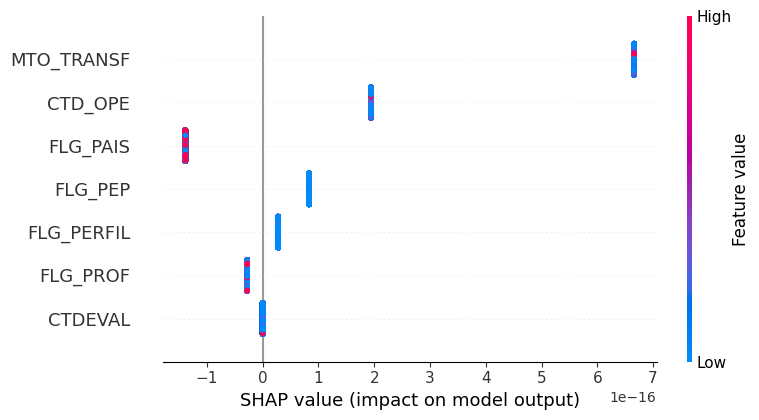

In [11]:
#Gráfico resumen de shap values para cada variable
shap.summary_plot(shap_values, dataframe[features])

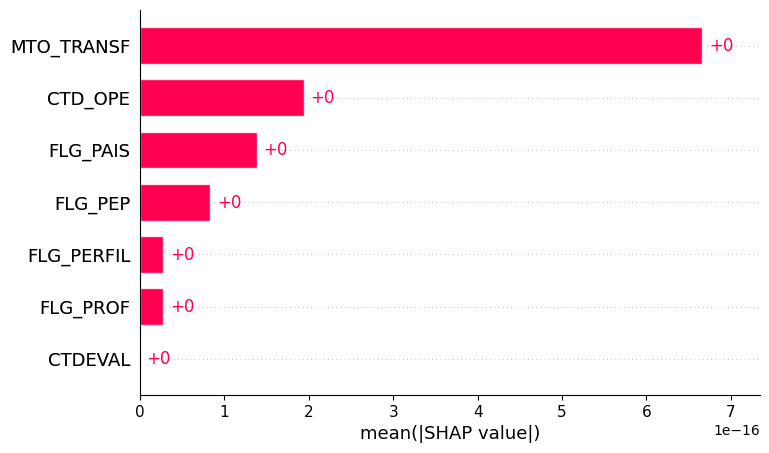

In [12]:
#Importancia de variables
shap.plots.bar(shap_values)

## 6. Siluetas diferentes modelos

### Model Test1: Variables modelo estándar (Todas las variables)

In [13]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PEP', 'FLG_PROF', 'FLG_PERFIL','CTDEVAL', 'FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8022603770165968
 k= 6  SC= 0.8324863535492967
 k= 7  SC= 0.8496186698339125
 k= 8  SC= 0.8585145430038617
 k= 9  SC= 0.8670152321782827
 k= 10  SC= 0.8317108384068044
 k= 15  SC= 0.7525418011538589


### Model Test2: Variables modelo estándar sin variable CTDEVAL

In [14]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PEP', 'FLG_PROF', 'FLG_PERFIL','FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.804789489050684
 k= 6  SC= 0.8350006575758869
 k= 7  SC= 0.8521788650820484
 k= 8  SC= 0.8612804531172144
 k= 9  SC= 0.8697949729445416
 k= 10  SC= 0.8364251695998323
 k= 15  SC= 0.7652919269343261


### Model Test3: Variables modelo estándar sin variable FLG_PEP

In [15]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PROF', 'FLG_PERFIL','CTDEVAL', 'FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8180547408943425
 k= 6  SC= 0.8490982850522826
 k= 7  SC= 0.8665264954431136
 k= 8  SC= 0.8750874403506251
 k= 9  SC= 0.8387297385740153
 k= 10  SC= 0.8069659624187119
 k= 15  SC= 0.674612618207509


### Model Test4: Variables modelo estándar sin variables PEP ni CTDEVAL

In [16]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PROF', 'FLG_PERFIL', 'FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8210007387812217
 k= 6  SC= 0.8521733461377882
 k= 7  SC= 0.8696575141735371
 k= 8  SC= 0.8782332520789269
 k= 9  SC= 0.8443071545618964
 k= 10  SC= 0.813286233677686
 k= 15  SC= 0.7155786496745383


### Model Test 5: Solo variables cuantis

In [17]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'CTDEVAL']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.557460201780616
 k= 6  SC= 0.5455162429117724
 k= 7  SC= 0.49780034547275825
 k= 8  SC= 0.498521213856912
 k= 9  SC= 0.48614878476127743
 k= 10  SC= 0.4959345347234385
 k= 15  SC= 0.5125563691826843


### Model Test6: Variables modelo estándar sin variables PEP ni CTDEVAL ni PERFIL

In [18]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTD_OPE', 'FLG_PROF', 'FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8399318828046103
 k= 6  SC= 0.8078572542908127
 k= 7  SC= 0.784108324688355
 k= 8  SC= 0.7476710403304518
 k= 9  SC= 0.7248247310670451
 k= 10  SC= 0.698340312016404
 k= 15  SC= 0.6116711669627084


### Model Test7: Variables modelo estándar sin variables CTDOPE

In [19]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'CTDEVAL', 'FLG_PEP', 'FLG_PROF', 'FLG_PERFIL','FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8207218058267034
 k= 6  SC= 0.8520045309434877
 k= 7  SC= 0.8698546964210567
 k= 8  SC= 0.8790993997980004
 k= 9  SC= 0.8879059479411482
 k= 10  SC= 0.8615923713668296
 k= 15  SC= 0.8221139488478032


### Model Test7: Variables modelo estándar sin variables CTDOPE ni CTDEVAL

In [20]:
#Selecciono variables
ds=dataframe[['MTO_TRANSF', 'FLG_PEP', 'FLG_PROF', 'FLG_PERFIL','FLG_PAIS']]
#Estandarizo variables
data1_cluster = MinMaxScaler().fit_transform(ds)
#Selecciono números de clusters a probar
k = [5,6,7,8,9,10,15]
#Calculo siluetas
for ki in k:
        outputKMeans = KMeans(n_clusters = ki, init='k-means++', random_state = 7).fit(data1_cluster)
        scoreSilhoutte = metrics.silhouette_score(data1_cluster, outputKMeans.labels_, metric='euclidean')
        print(" k=", ki," SC=", scoreSilhoutte)

 k= 5  SC= 0.8237254043390763
 k= 6  SC= 0.8551478369745471
 k= 7  SC= 0.8730595848250633
 k= 8  SC= 0.8824444624928874
 k= 9  SC= 0.891355929587455
 k= 10  SC= 0.8676687395202091
 k= 15  SC= 0.8302432242756971
